<a href="https://colab.research.google.com/github/vishvas-chauhan/First_Repository/blob/master/image%20resize%2C%20matplotlib%2C%20corelation%2C%20gridsearch%2C%20regression%2C%20biquery%20upload.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
#@title mysql connections
!pip install mysql-connector-python 

In [180]:
#@title catboost regression
!pip install catboost


In [181]:
#@title sql conn
import mysql.connector
import pandas as pd
from sqlalchemy import create_engine

class JskDB:
    """
    Example of SQL connection class
    """
    
    def __init__(self):
        # MySQL database credentials 
        self.host = 'jellybas.cxvglcwgczps.us-west-2.rds.amazonaws.com'
        self.port = 3306
        self.user = 'da_ro' 
        self.password = 'UXDcu5ULheGEYJWF78Zy'
        self.db = 'da2'

    def create_connection(self):
        """Initialize MySQL connection"""
        engine = create_engine(f"mysql+mysqlconnector://{self.user}:{self.password}@{self.host}:{self.port}/{self.db}?charset=utf8",echo=False).connect()

        try:
            print(engine)
            return engine
        except Exception as e:
            print(e)


# How to use 
def my_function():
    """
    open a MySQL connection, run your code and close the connection
    """

    # open connection
    sql_connection = JskDB().create_connection()
    
    # My code to do something in MySQL Database
    
    # close connection
    sql_connection.close()

In [182]:
#@title color class
class color:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [183]:
#@title downcast to save memory_usage
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% compressed'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

###codes

In [184]:
sql_connection = JskDB().create_connection()

In [185]:
sql_connection.execute("SHOW TABLES").fetchall()

[('snap_audience',), ('snap_behavior',), ('snap_channels',), ('snap_stories',)]

In [186]:
sql1 ="select * from snap_channels"
sql2 ="select * from snap_audience"
sql3 ="select * from snap_behavior"
sql4 ="select * from snap_stories"

In [187]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [188]:

df_channel = pd.read_sql(sql1, sql_connection)
df_snap_audience = pd.read_sql(sql2, sql_connection)
df_snap_behavior = pd.read_sql(sql3, sql_connection)
df_snap_stories = pd.read_sql(sql4, sql_connection)

In [189]:
df_channel.head()

,channel_fbid,channel_name
0,5099640474828800,Riddle Me This
1,5109890280062976,Beauty Wow
2,5132076604719104,Beauty Hacks
3,5171177986981888,Accuse moi si tu peux


In [190]:
df_snap_audience.head(3)

,channel_fbid,channel_name,datestat,daily_unique,monthly_unique,followers,loyal_users_perc,loyal_users,frq_users_perc,frq_users,return_users_perc,return_users,new_users_perc,new_users,new_followers_per_day
0,5099640474828800,Riddle Me This,2018-06-27,1588120,1588120,210020,0.0,0,0.00,0,0.00,0,1.00,1588120,0
1,5099640474828800,Riddle Me This,2018-06-28,668541,2189859,210020,0.0,0,0.00,0,0.10,65995,0.90,602546,0
2,5099640474828800,Riddle Me This,2018-06-29,457782,2579107,210265,0.0,0,0.01,4441,0.14,64559,0.85,388782,245


In [191]:
df_snap_behavior.head(3)

,channel_fbid,datestat,topsnaps_unique_per_user,total_time_viewed_sec,time_spent,topsnap_views_perc,topsnap_views,topsnap_views_unique,screenshots,shares
0,5099640474828800,2018-06-27,9.1119,128663480,81.016220,1.0,22394967,14470763,4193,4400
1,5099640474828800,2018-06-28,8.5957,50349224,75.312096,1.0,8745435,5746557,1443,1550
2,5099640474828800,2018-06-29,8.2505,33378296,72.913081,1.0,5816191,3776914,1184,845


In [192]:
df_snap_stories.head(3)

,channel_fbid,story,country,type,position,media_name,publication_date,expiration_date,nb_duration_hrs,topsnap_views,att_views,total_time_viewed_sec,topsnap_time_viewed_sec,att_time_viewed_sec,avg_time_viewed_per_user_sec,avg_time_per_topsnap_view_sec,avg_time_per_att_view_sec,unique_viewers,unique_completers,completion_rate,topsnaps_unique_views,followers_added,shares_unique,shares,viewers_from_shares,screenshots,tags
0,5099640474828800,RIDDLE ME THIS - E02,AE,PUBLISHER_STORY,0,0,2018-06-27,2018-07-04,168.0,583394,47226,2697820.0,2.272860e+06,424963.0,42.4653,3.8959,8.9985,63530,10294,0.0000,379075,754,136,310,250,192,0
1,5099640474828800,RIDDLE ME THIS - E02,AE,SNAP,1,0,2018-06-27,2018-07-04,168.0,89236,11467,315396.0,1.891941e+05,126202.0,5.1380,2.1202,11.0057,61385,7398,0.1205,61525,0,50,197,70,60,0
2,5099640474828800,RIDDLE ME THIS - E02,AE,SNAP,2,0,2018-06-27,2018-07-04,168.0,39274,0,99931.6,9.993158e+04,0.0,3.3233,2.5445,0.0000,30070,7314,0.2432,30591,0,22,16,36,5,0


In [193]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)

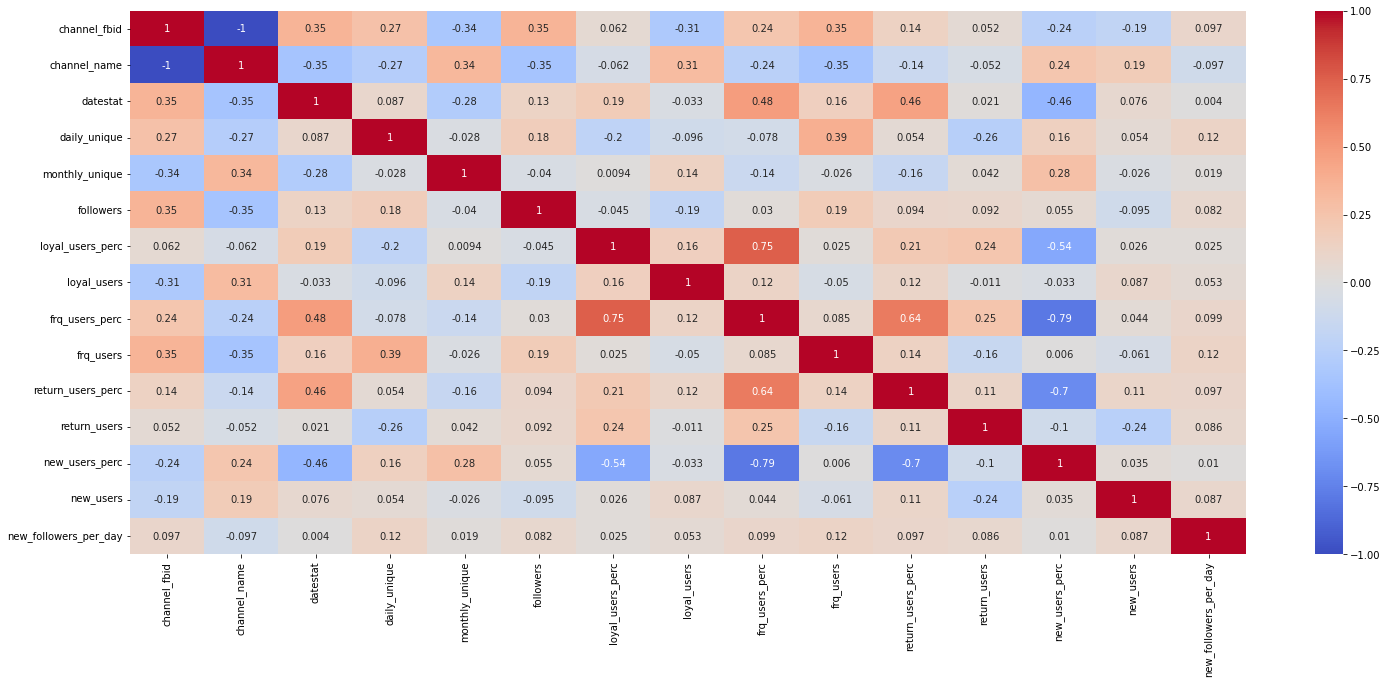

In [194]:
#@title audience corrrelation
df_temp=df_snap_audience.astype(str)
fit = df_temp.apply(lambda x: d[x.name].fit_transform(x))
#fit.apply(lambda x: d[x.name].inverse_transform(x))
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
corr = fit.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

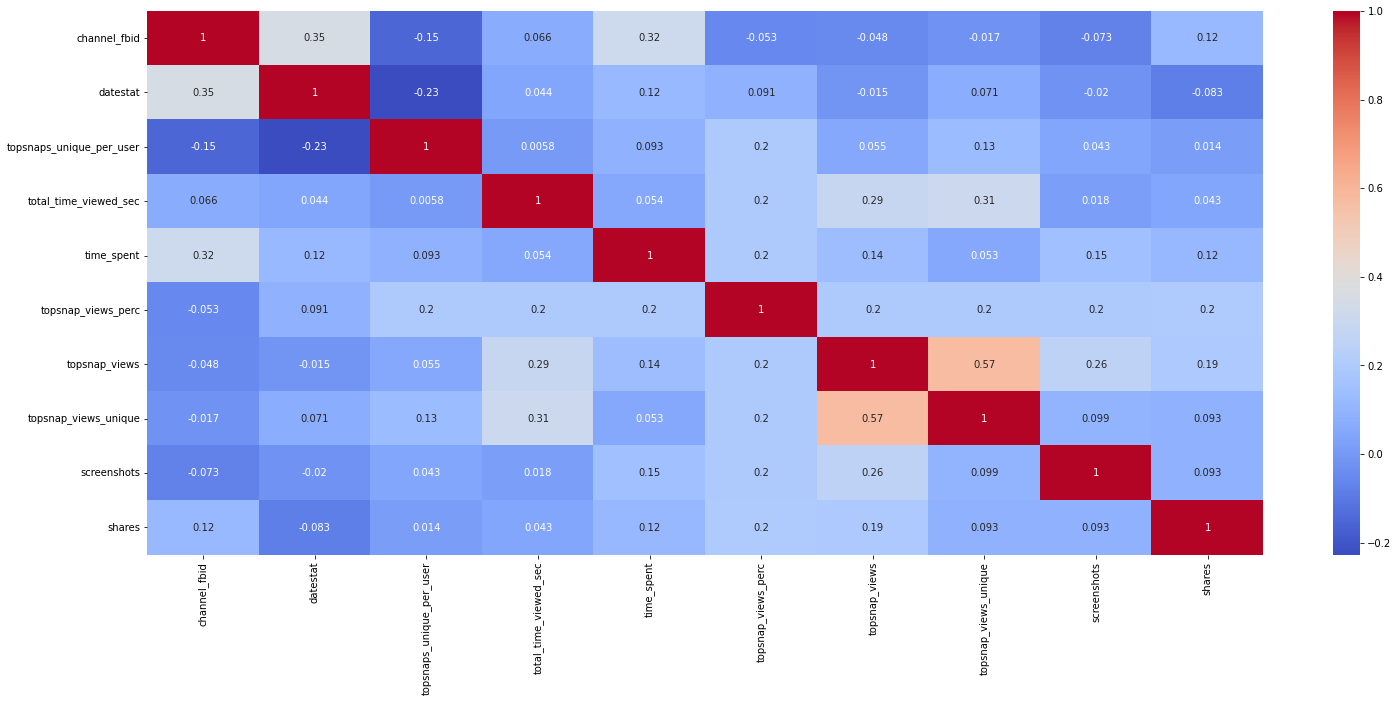

In [195]:
#@title snap_behavior_correlation
df_temp=df_snap_behavior.astype(str)
fit = df_temp.apply(lambda x: d[x.name].fit_transform(x))
#fit.apply(lambda x: d[x.name].inverse_transform(x))
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
corr = fit.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

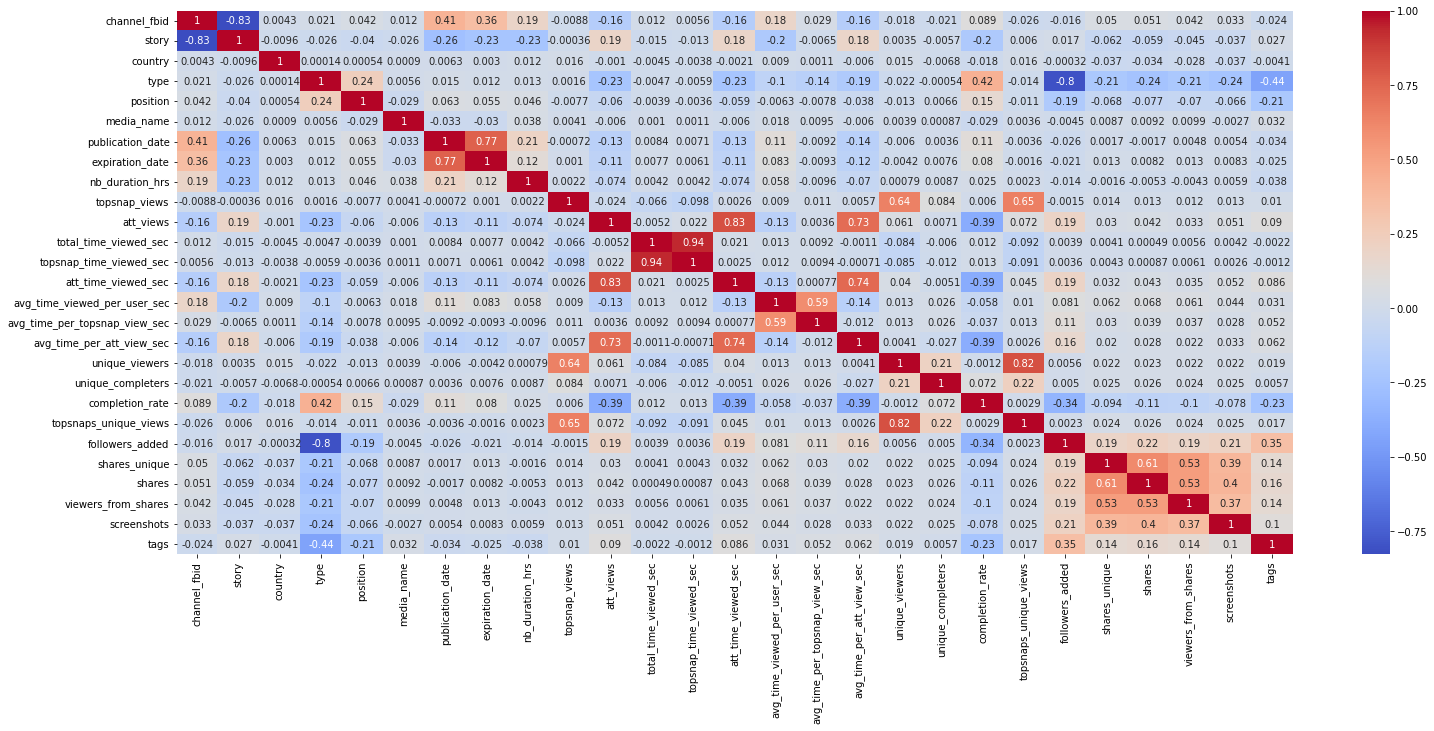

In [196]:
#@title snap_behavior_correlation
df_temp=df_snap_stories.astype(str)
fit = df_temp.apply(lambda x: d[x.name].fit_transform(x))
#fit.apply(lambda x: d[x.name].inverse_transform(x))
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
corr = fit.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [197]:
#creating framing for looping
df_frame = [df_channel,df_snap_audience,df_snap_behavior,df_snap_stories]

In [198]:
for i,df in enumerate(df_frame):
    print(i)
    print(df.nunique())
    print(' ')

    print(df.info())
    print('****' *40)

0
channel_fbid    4
channel_name    4
dtype: int64
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channel_fbid  4 non-null      int64 
 1   channel_name  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes
None
****************************************************************************************************************************************************************
1
channel_fbid               4
channel_name               4
datestat                 138
daily_unique             364
monthly_unique           365
followers                359
loyal_users_perc           8
loyal_users              340
frq_users_perc            26
frq_users                357
return_users_perc         37
return_users             361
new_users_perc            53
new_users                365
new_followers_per_day    355
dtype: int64
 
<class

In [199]:
#@title ##no null values found
#to check null values
for df in df_frame:
    print(df.isnull().sum())
    print(' ')
    print('---------------------------------')

channel_fbid    0
channel_name    0
dtype: int64
 
---------------------------------
channel_fbid             0
channel_name             0
datestat                 0
daily_unique             0
monthly_unique           0
followers                0
loyal_users_perc         0
loyal_users              0
frq_users_perc           0
frq_users                0
return_users_perc        0
return_users             0
new_users_perc           0
new_users                0
new_followers_per_day    0
dtype: int64
 
---------------------------------
channel_fbid                0
datestat                    0
topsnaps_unique_per_user    0
total_time_viewed_sec       0
time_spent                  0
topsnap_views_perc          0
topsnap_views               0
topsnap_views_unique        0
screenshots                 0
shares                      0
dtype: int64
 
---------------------------------
channel_fbid                     0
story                            0
country                          0
type   

In [200]:
#to see the percentiles values
for df in df_frame:
    print(df.columns)

Index(['channel_fbid', 'channel_name'], dtype='object')
Index(['channel_fbid', 'channel_name', 'datestat', 'daily_unique',
       'monthly_unique', 'followers', 'loyal_users_perc', 'loyal_users',
       'frq_users_perc', 'frq_users', 'return_users_perc', 'return_users',
       'new_users_perc', 'new_users', 'new_followers_per_day'],
      dtype='object')
Index(['channel_fbid', 'datestat', 'topsnaps_unique_per_user',
       'total_time_viewed_sec', 'time_spent', 'topsnap_views_perc',
       'topsnap_views', 'topsnap_views_unique', 'screenshots', 'shares'],
      dtype='object')
Index(['channel_fbid', 'story', 'country', 'type', 'position', 'media_name',
       'publication_date', 'expiration_date', 'nb_duration_hrs',
       'topsnap_views', 'att_views', 'total_time_viewed_sec',
       'topsnap_time_viewed_sec', 'att_time_viewed_sec',
       'avg_time_viewed_per_user_sec', 'avg_time_per_topsnap_view_sec',
       'avg_time_per_att_view_sec', 'unique_viewers', 'unique_completers',
       '

[<matplotlib.lines.Line2D object at 0x7f8d4d3a20d0>, <matplotlib.lines.Line2D object at 0x7f8d4d354290>, <matplotlib.lines.Line2D object at 0x7f8d4d354450>, <matplotlib.lines.Line2D object at 0x7f8d4d354610>]


,followers,return_users,new_followers_per_day,new_users
count,3.690000e+02,3.690000e+02,369.000000,3.690000e+02
mean,9.034128e+05,1.277141e+05,12418.265583,3.431366e+05
std,6.554552e+05,1.699722e+05,18635.975215,4.264066e+05
min,0.000000e+00,0.000000e+00,-470.000000,0.000000e+00
25%,3.693050e+05,4.506200e+04,2096.000000,1.040250e+05
50%,6.637570e+05,7.421200e+04,5387.000000,1.905080e+05
75%,1.501428e+06,1.497300e+05,15183.000000,4.047480e+05
max,2.045300e+06,1.486638e+06,122710.000000,3.227073e+06


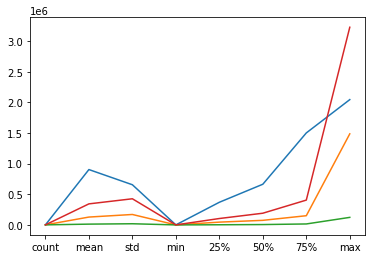

In [201]:
a_imp =df_snap_audience[['followers','return_users', 'new_followers_per_day','new_users']]
print(plt.plot(a_imp.describe()))
a_imp.describe()

[<matplotlib.lines.Line2D object at 0x7f8d4d2cb910>, <matplotlib.lines.Line2D object at 0x7f8d4d323b50>, <matplotlib.lines.Line2D object at 0x7f8d4d323d10>, <matplotlib.lines.Line2D object at 0x7f8d4d323650>]


,screenshots,shares,time_spent,topsnap_views_perc
count,369.000000,369.000000,369.000000,369.000000
mean,1821.769648,1689.430894,79.535624,0.986450
std,4810.834101,3333.131578,41.442226,0.115771
min,0.000000,0.000000,0.000000,0.000000
25%,222.000000,248.000000,47.993810,1.000000
50%,462.000000,496.000000,65.476978,1.000000
75%,1260.000000,1518.000000,111.706157,1.000000
max,52314.000000,29843.000000,186.510438,1.000000


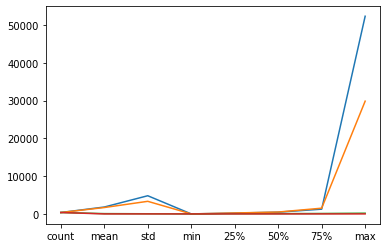

In [202]:
b_imp= df_snap_behavior[['screenshots','shares', 'time_spent','topsnap_views_perc']]
print(plt.plot(b_imp.describe()))
b_imp.describe()


<a id="infer_over"></a>
##  1.1  Overview
The overview section will cover the basic topics related to understanding inferential statistics.

###  1.1.1  Normal Distribution
Normal Distribution graph is symmetrical and it’s mean, median and mode are equal (no skew).  It is denoted by:<br>
\begin{align*} 
\mathsf{\text{N} \sim (\mu, \sigma^2)}
\end{align*}
*  Change in $\mu$ will move the curve left or right.
*  Change in $\sigma$ will narrow (lower $\sigma$) or flatten (higher $\sigma$) the curve.
<br>The Normal distribution approximates a wide number of random variables. However, not all random variables follow a Normal distribution.

###  1.1.2  Standardization
Standardization is the process of transforming ($\mu,\sigma^2$) to one with a mean zero and a standard deviation of one (0,1).  Every distribution can be standardized  and the sampling distribution is denoted by:
\begin{align*} 
\mathsf{\text{Sampling Distribution} = \frac{\sigma}{\sqrt{n}} \quad \text{for N} \sim (\mu,\frac{\sigma^2}{n}), \quad \text{where n > 30}}
\end{align*}
Z-Score helps us find the standard normal distribution from any normally distributed dataset.
\begin{align*} 
\mathsf{\text{Z-Score:} \quad Z = \frac{x-\mu)}{\sigma} \sim N(0,1)}
\end{align*}

###  1.1.3  Central Limit Theorem
The Central Limit Theorem (CLT for short) basically says that for non-normal data, the distribution of the sample means has an approximate normal distribution, as long as the sample size is large enough (usually at least 30) and all samples have the same size. 

###  1.1.4  Standard Error
The standard error is the approximate standard deviation of a statistical sample population.  The more data points involved in the calculations of the mean, the smaller the standard error tends to be.  It is given by:
\begin{align*} 
\mathsf{\text{SE} = \frac{\sigma}{\sqrt{n}}}
\end{align*}

###  1.1.5  Estimators and Estimates
Estimators are variables that provide a means to estimate some parameter.  Estimates are the actual results of the estimator calculations.  Following table shows the estimators and estimates:

| term | parameter | **ESTIMATOR** |  **ESTIMATE** |
| :--- | :--- | :--- | :--- |
|mean	| $\mu$ | $\bar{x}$ |  51.2 |
|variance | $\sigma^2$ | $s^2$  | 9.2 |
|correlation | $\rho$ | R | .85 |


<a id="infer_confint"></a>
##  1.2  Confidence Interval
The concept of Confidence Interval was introduced by Polish mathematician and statistician, Jerzy Neyman in 1937 and is very important in statistics, particularly in hypothesis testing.  A confidence interval calculates the probability that a population parameter will fall between an upper and lower interval.  It is a simply way to measure how well a sample represents the population being studied.

|  | **point<br>estimator** | **test<br>statistics** | **standard<br>error** |
| :--- | :---: | :---: | :---: |
| **Confidence Interval** | $\mathsf{ \large \bar{x}}$ | $\mathsf{\large \pm z_{\alpha/2}}$ | $\mathsf{ \large \times \large \frac{s}{\sqrt{n}}}$ |


<img src='https://analystprep.com/cfa-level-1-exam/wp-content/uploads/2019/10/page-159.jpg' />

The confidence interval is expressed as a percentage (the most frequently quoted percentages are 90%, 95%, and 99%). The percentage reflects the **confidence level**.

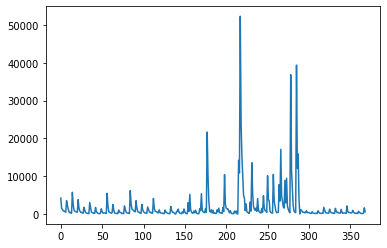

In [203]:
b_imp.screenshots.plot()

Behaviour distribution


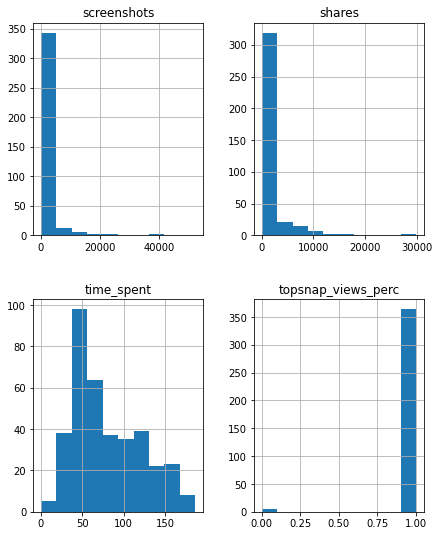

In [204]:
print(f"{color.OKBLUE}{color.BOLD}Behaviour distribution")
fig = plt.figure(figsize = (7,9))
ax = fig.gca()
b_imp.hist(ax = ax)
warnings.filterwarnings("ignore")
#plt.title( fontsize=14, color='red')


Audience distribution


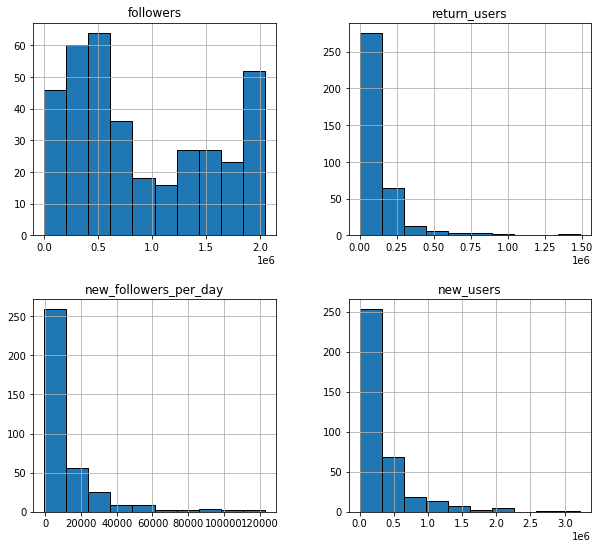

In [205]:
print(f"{color.OKBLUE}{color.BOLD}Audience distribution")

a_imp.hist(figsize=(10,9), ec="k")
warnings.filterwarnings("ignore")

### followers regression preditions @catboost

In [206]:
#to check the follower dependcies we can check correlation chart

In [207]:
import datetime
from sklearn.model_selection import train_test_split

In [208]:
df_snap_audience.head(2)

,channel_fbid,channel_name,datestat,daily_unique,monthly_unique,followers,loyal_users_perc,loyal_users,frq_users_perc,frq_users,return_users_perc,return_users,new_users_perc,new_users,new_followers_per_day
0,5099640474828800,Riddle Me This,2018-06-27,1588120,1588120,210020,0.0,0,0.0,0,0.0,0,1.0,1588120,0
1,5099640474828800,Riddle Me This,2018-06-28,668541,2189859,210020,0.0,0,0.0,0,0.1,65995,0.9,602546,0


In [209]:
X=df_snap_audience[['channel_name','datestat','daily_unique','loyal_users','frq_users','new_users']]
y=df_snap_audience[['followers']]

In [210]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)
y=y.apply(LabelEncoder().fit_transform)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.90, random_state =42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.85, random_state =42)
categorical_features_indices = np.where(X.dtypes != np.float)[0]
categorical_features_indices

array([0, 1, 2, 3, 4, 5])

In [212]:
import catboost
from catboost import MetricVisualizer, Pool, CatBoostRegressor, cv
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [213]:
model_params = {
    'svr':{'model':SVR(gamma='auto'),'params':{'C':[1,10],'kernel':['rbf']}},
    'rfr':{'model':RandomForestRegressor(),'params':{'max_depth':[2,5]}},
    'lr': {'model':LinearRegression(),'params':{'fit_intercept':[True]}},
    'cbr':{'model':CatBoostRegressor(),'params':{'iterations':[150,300],'loss_function': ['RMSE']}},
}

In [214]:
scores=[]

for model_name, mp in model_params.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
  clf.fit(X_train,y_train)
  scores.append({'model':model_name,'best_score': clf.best_score_,'best_params':clf.best_params_})

Learning rate set to 0.126549
0:	learn: 97.6764834	total: 1.48ms	remaining: 221ms
1:	learn: 89.8421638	total: 2.7ms	remaining: 200ms
2:	learn: 81.9767080	total: 3.89ms	remaining: 191ms
3:	learn: 75.7264656	total: 5.09ms	remaining: 186ms
4:	learn: 70.1521854	total: 6.34ms	remaining: 184ms
5:	learn: 63.9538745	total: 7.61ms	remaining: 183ms
6:	learn: 59.3904239	total: 9.09ms	remaining: 186ms
7:	learn: 54.9004711	total: 10.7ms	remaining: 190ms
8:	learn: 50.8850110	total: 12.3ms	remaining: 193ms
9:	learn: 47.0851057	total: 13.8ms	remaining: 193ms
10:	learn: 43.7842093	total: 15.3ms	remaining: 193ms
11:	learn: 40.4083392	total: 16.9ms	remaining: 195ms
12:	learn: 37.7896724	total: 18.4ms	remaining: 194ms
13:	learn: 35.0515803	total: 20ms	remaining: 194ms
14:	learn: 32.0280236	total: 21.5ms	remaining: 194ms
15:	learn: 30.3279025	total: 23ms	remaining: 193ms
16:	learn: 28.7441747	total: 24.6ms	remaining: 192ms
17:	learn: 26.9470484	total: 26.1ms	remaining: 191ms
18:	learn: 25.3063316	total: 27

In [215]:
df2=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2


,model,best_score,best_params
0,svr,-0.012071,"{'C': 10, 'kernel': 'rbf'}"
1,rfr,0.989796,{'max_depth': 5}
2,lr,0.693759,{'fit_intercept': True}
3,cbr,-107.657090,"{'iterations': 300, 'loss_function': 'RMSE'}"


In [216]:
#random forest is showing best.. but lets try differently on catboost hypertunning

In [217]:
X=df_snap_audience[['channel_name','datestat','daily_unique','loyal_users','frq_users','new_users']]
y=df_snap_audience[['followers']]

In [218]:
X.head()

,channel_name,datestat,daily_unique,loyal_users,frq_users,new_users
0,Riddle Me This,2018-06-27,1588120,0,0,1588120
1,Riddle Me This,2018-06-28,668541,0,0,602546
2,Riddle Me This,2018-06-29,457782,0,4441,388782
3,Riddle Me This,2018-06-30,291245,0,8238,230185
4,Riddle Me This,2018-07-01,342089,163,14626,277084


In [219]:
X.datestat =(X.datestat - X.datestat.min())  / np.timedelta64(1,'D')

In [220]:

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.90, random_state =42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.85, random_state =42)
categorical_features_indices = np.where(X.dtypes != np.float)[0]
categorical_features_indices

array([0, 2, 3, 4, 5])

In [221]:
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features_indices)

val_pool = Pool(data=X_val, label=y_val, cat_features=categorical_features_indices)

# No need to init here
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features_indices)

In [222]:
params = {
   'iterations':1500,
   'loss_function': 'RMSE',
   'learning_rate':0.0109, #1 0.102,
   'depth': 6,
   'l2_leaf_reg': 6,
   
   'border_count': 7,
   'thread_count': 7,
   
   'bagging_temperature': 2,
   'random_strength': 2.23,
   'colsample_bylevel': 0.85,
   
   'custom_metric': ['MAPE', 'R2'], #  'MAPE'] # R2, Quantile,
   'eval_metric': 'R2', # 'MAPE', # Overfitting detection if `use_best_model` is enabled
   'random_seed': 42,
   
   # 'max_ctr_complexity': 2,
   #'logging_level': 'Silent',
   'use_best_model':False # Takes
}

In [223]:
reg_model = CatBoostRegressor(**params)
reg_model.fit(train_pool, eval_set=val_pool, plot=True, verbose=100)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0139576	test: 0.0136952	best: 0.0136952 (0)	total: 3.08ms	remaining: 4.61s
100:	learn: 0.6716503	test: 0.6605699	best: 0.6605699 (100)	total: 132ms	remaining: 1.82s
200:	learn: 0.8342738	test: 0.8103550	best: 0.8103550 (200)	total: 272ms	remaining: 1.76s
300:	learn: 0.8934114	test: 0.8661880	best: 0.8661880 (300)	total: 426ms	remaining: 1.7s
400:	learn: 0.9182509	test: 0.8933198	best: 0.8933198 (400)	total: 611ms	remaining: 1.68s
500:	learn: 0.9323964	test: 0.9110962	best: 0.9110962 (500)	total: 763ms	remaining: 1.52s
600:	learn: 0.9426806	test: 0.9238300	best: 0.9238522 (599)	total: 1.02s	remaining: 1.52s
700:	learn: 0.9509014	test: 0.9309583	best: 0.9310244 (696)	total: 1.25s	remaining: 1.42s
800:	learn: 0.9555509	test: 0.9346400	best: 0.9346400 (800)	total: 1.46s	remaining: 1.27s
900:	learn: 0.9585318	test: 0.9371371	best: 0.9371643 (898)	total: 1.67s	remaining: 1.11s
1000:	learn: 0.9604416	test: 0.9382923	best: 0.9383344 (992)	total: 1.86s	remaining: 930ms
1100:	learn: 

     Feature Id  Importances
0  channel_name    68.844525
1      datestat    26.438848
2   loyal_users     4.159211
3     frq_users     0.496086
4     new_users     0.041229
5  daily_unique     0.020100
importannce of columns followers growth or decline


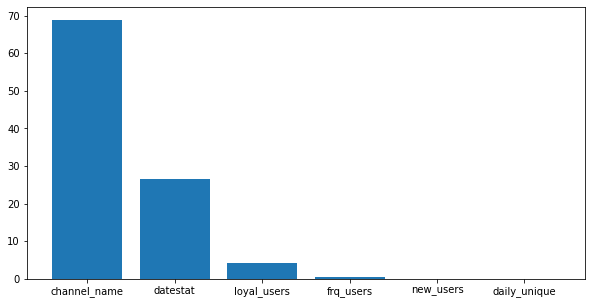

In [224]:
importances = reg_model.get_feature_importance(prettified=True)
print(importances)
plt.figure(figsize=(10,5))
plt.bar(importances['Feature Id'],importances['Importances'])
print(f"{color.BOLD}{color.HEADER}importannce of columns followers growth or decline")

In [225]:
X_test['predict_followers']=reg_model.predict(X_test)
X_test['predict_followers'] = round(X_test['predict_followers'])
X_test.head()


,channel_name,datestat,daily_unique,loyal_users,frq_users,new_users,predict_followers
326,Accuse moi si tu peux,95.0,485997,7485,52759,307921,447015.0
33,Riddle Me This,33.0,174035,6432,22017,104025,1186101.0
15,Riddle Me This,15.0,841230,2526,35199,644859,1186101.0
345,Accuse moi si tu peux,114.0,291000,10577,41325,170037,610058.0
57,Riddle Me This,57.0,716721,5592,43585,523884,1603544.0


In [226]:
y_test.head()


,followers
326,440733
33,1274945
15,752687
345,581001
57,1567597


### Loading data to bigquery #notneeded

*   code can't be displayed it contains info for my dataset and project
* sample code <pandas_gbq.to_gbq(df, destination_id = 'dataset.table', project_id='project_id')/>



In [228]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [246]:
files.upload()

Saving Screenshot 2021-09-18 at 13.25.31.png to Screenshot 2021-09-18 at 13.25.31.png


{'Screenshot 2021-09-18 at 13.25.31.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x082\x00\x00\x03<\x08\x06\x00\x00\x00\xaf\x1e\x12\x19\x00\x00\x0cliCCPICC Profile\x00\x00H\x89\x95W\x07XS\xc9\x16\x9e[\x92\x90\x90\xd0\x02\x08H\t\xbd\t\xd2\t %\x84\x16@z\x11D%$\x81\x84\x12cBP\xb1\xa3\x8b\n\xae]D\xb1\xa2\xab"\x8am\xa5\xd9\xb1+\x8bb\xef\x8b\x05\x15e]\xd4\xc5\x86\xca\x9b\x90\x80\xae\xfb\xca\xf7N\xbe\xb9\xf7\xcf\x993\xff)\x99\xc9\xbd\x07\x00\xcd\x0f\\\x89$\x1f\xd5\x02\xa0@\\(M\x08\x0ff\x8cIKg\x90:\x01\t~t\x00\x1d\x18sy2\t+..\x1a@\x19\xbc\xff]\xde\xdd\x00\x88\xe2~\xd5I\xc1\xf5\xcf\xf9\xff*:|\x81\x8c\x07\x00\x92\x01q\x16_\xc6+\x80\xf88\x00\xf8:\x9eDZ\x08\x00Q\xa1\xb7\x9c\\(Q\xe0\xd9\x10\xebJa\x80\x10\xafT\xe0\x1c%\xde\xa1\xc0YJ|x\xc0&)\x81\r\xf1e\x00\xd4\xa8\\\xae4\x07\x00\x8d{P\xcf(\xe2\xe5@\x1e\x8d\xcf\x10\xbb\x88\xf9"1\x00\x9a# \x0e\xe0\t\xb9|\x88\x15\xb1\x8f((\x98\xa8\xc0\x95\x10\xdbA{\t\xc40\x1e\xc0\xcc\xfa\x8e3\xe7o\xfcYC\xfc\\n\xce\x10V\xe65 j!"\x99$\x9f;\xf5\xff,\xcd\xff\x96\x82|\

###output time seriees Arima+ next 30 days predicitons

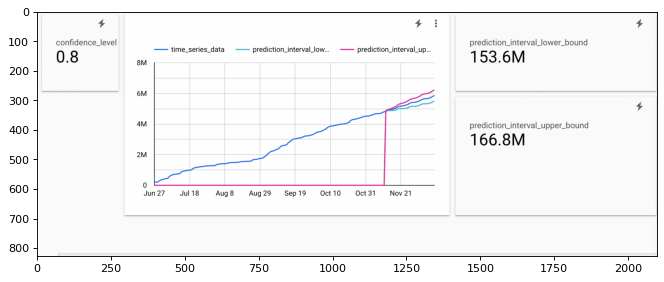

 It is showing upper bound interval and lower bound interval for  predicted total number of follwers in next 30days


In [254]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("Screenshot 2021-09-18 at 13.25.31.png")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(img_cvt)

plt.show()
print(f'{color.BOLD} {color.OKBLUE}It is showing upper bound interval and lower bound interval for  predicted total number of follwers in next 30days')

In [229]:
from google.colab import files

In [230]:
con_main= [df['channel_fbid']==5099640474828800,df['channel_fbid']==5109890280062976,df['channel_fbid']==5132076604719104,df['channel_fbid']==5171177986981888]
choice=['Riddle Me This','Beauty Wow','Beauty Hacks','Accuse moi si tu peux']


In [ ]:
np.where(consumption_energy > 400, 'high', 
         (np.where(consumption_energy < 200, 'low', 'medium')))

In [234]:
for df in df_frame:
        df['channel_fbid']=np.where(df['channel_fbid']==5099640474828800,'Riddle Me This',
                                    (np.where(df['channel_fbid']==5109890280062976,'Beauty Wow',
                                    (np.where(df['channel_fbid']==5132076604719104,'Beauty Hacks',
                                    (np.where(df['channel_fbid']==5171177986981888,'Accuse moi si tu peux',
                                              'no channel name found')))))))

In [241]:
df_snap_audience.to_csv('df_snap_audience.csv',index=False) 
files.download('df_snap_audience.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [236]:

df_snap_behavior.to_csv('df_snap_behavior.csv',index=False) 
files.download('df_snap_behavior.csv')
df_snap_stories.to_csv('df_snap_stories.csv',index=False) 
files.download('df_snap_stories.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###technical feedbacks

In [ ]:
#I am always sceptical while using date in regression- but in most cases it helps in accuracy

#as I noticed followers are mainly corelated with frq.users, channel name and time 
#time_series is the right predictions for this data for that I will use Arima_plus
#problems that I would face is lack of data 

#(time series- arima needs atleast 2 years of data)
#(multivariate -lstm ann model needs atleast 3 years of data )

# but lets make the layout😊 

#data is not looking real world data. I hardly face linear/continious growth data in real project experience. 

###Non Technical feedbacks